In [4]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from louvain import Louvain
from collections import defaultdict
import pprint
import time
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\RAMDHAN\AppData\Local\Temp\ipykernel_10196\1418792107.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
G = nx.Graph()
edges = [(1,2),(1,3),(1,4),(2,4),(3,4),(4,5),(5,6),(5,7),(6,7),(7,8),(4,8),(4,12),(10,12),(10,8),(9,10),(8,9),(11,9),(11,10),(11,12)]
G.add_weighted_edges_from([(i,j,1.0) for i,j in edges])

In [1]:
def get_graphs():
    directory = '../DataSets/reels/'
    graphs = []
    for filename in os.listdir(directory):
        file_path = directory + filename + '/' + filename + '.gml'
        
        try:
            graph = nx.read_gml(file_path, label='id')
            for u, v, data in graph.edges(data=True):
                data['weight'] = 1
            graphs.append(graph)
        except Exception as e:
            print(f"Error loading graph from file {file_path}: {e}")
    return graphs

In [7]:
def load_synth_graph(path):
    # Read network.dat
    G = nx.Graph()
    with open(f'{path}network.dat', 'r') as f:
        for line in f:
            parts = line.split()
            node1 = int(parts[0])
            node2 = int(parts[1])
            G.add_edge(node1, node2)

    # Read community.dat
    communities = {}
    with open(f'{path}community.dat', 'r') as f:
        for line in f:
            parts = line.split()
            node = int(parts[0])
            community = int(parts[1])
            communities[node] = community

    # Assign community information to nodes in the graph
    for node, community in communities.items():
        if node in G.nodes:
            G.nodes[node]['community'] = community
    
    for u, v, data in G.edges(data=True):
        data['weight'] = 1

    print("Nodes:", G.nodes())
    print("Edges:", G.edges())
    print("Communities:", communities)
    return G

Nodes: [1, 8, 13, 15, 16, 22, 25, 29, 31, 33, 43, 44, 45, 47, 49, 50, 53, 56, 57, 58, 59, 60, 64, 65, 66, 67, 69, 75, 76, 78, 79, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 96, 98, 101, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 2, 9, 10, 12, 23, 35, 39, 40, 48, 51, 52, 54, 55, 62, 63, 70, 71, 72, 80, 91, 92, 94, 97, 100, 102, 104, 3, 11, 26, 30, 61, 95, 4, 14, 28, 36, 42, 68, 73, 74, 77, 99, 5, 7, 19, 21, 34, 37, 81, 6, 41, 46, 17, 38, 18, 32, 27, 24, 20]
Edges: [(1, 8), (1, 13), (1, 15), (1, 16), (1, 22), (1, 25), (1, 29), (1, 31), (1, 33), (1, 43), (1,

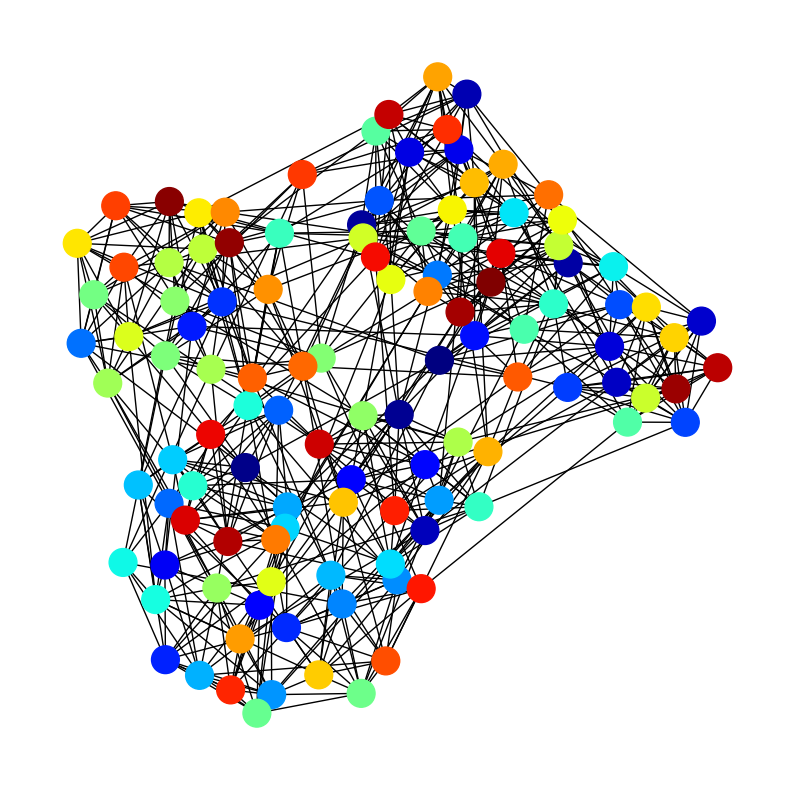

#################Start First Phase############
	Iteration 1
		Node: 0 Community: 0
			delta_Q with node 1 is 0.0014397142925573958
			delta_Q with node 4 is 0.0014556815490367754
			delta_Q with node 9 is 0.0014556815490367754
			delta_Q with node 16 is 0.0014556815490367754
			delta_Q with node 23 is 0.0014556815490367754
			delta_Q with node 33 is 0.001471648805516155
			delta_Q with node 35 is 0.0014556815490367754
			delta_Q with node 41 is 0.001471648805516155
			delta_Q with node 65 is 0.0014556815490367754
			delta_Q with node 90 is 0.0014876160619955346
			delta_Q with node 93 is 0.001471648805516155
			delta_Q with node 104 is 0.0014397142925573958
				Node: 0 Gain: 0.0014876160619955346 assigned to Community: 90 !!!!!!!
		Node: 1 Community: 1
			delta_Q with node 0 is 0.0012960089842429792
			delta_Q with node 25 is 0.0014556815490367754
			delta_Q with node 27 is 0.0014556815490367754
			delta_Q with node 33 is 0.001471648805516155
			delta_Q with node 37 is 0.00145568154903

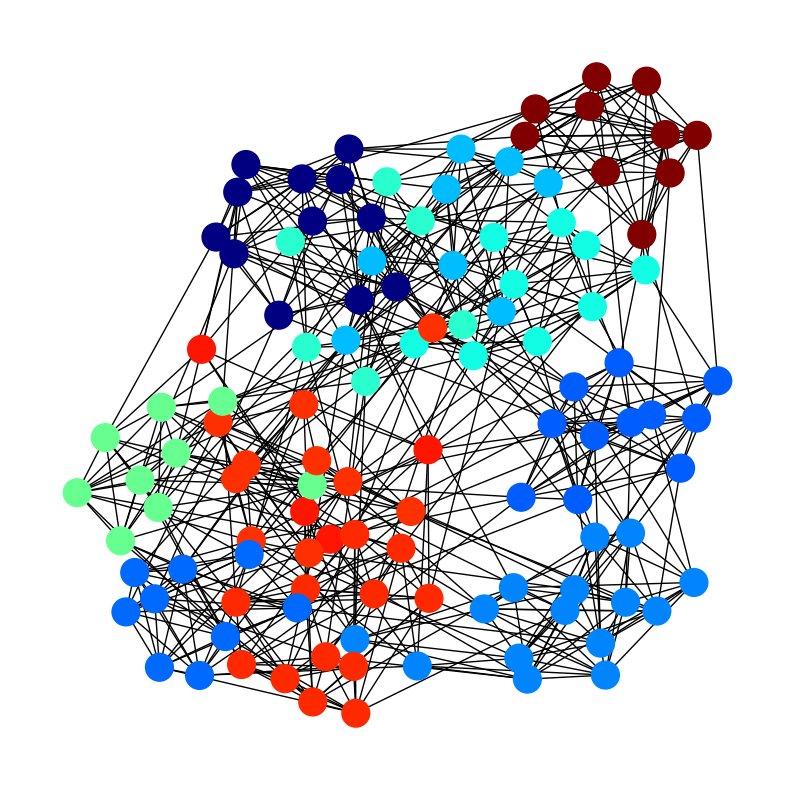

Drawing Communities...


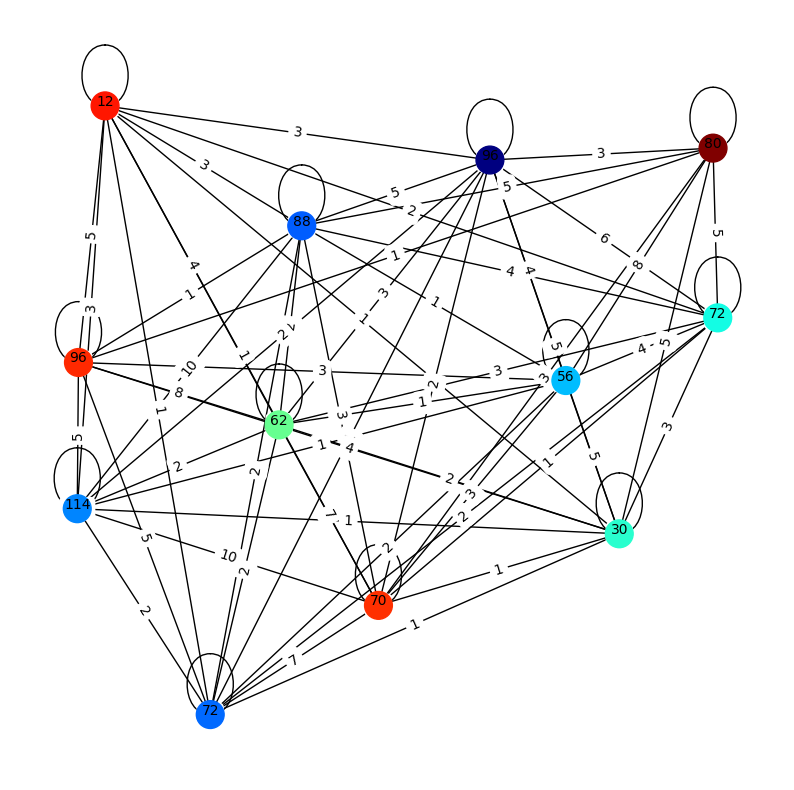

$$$$$$$$$$$$$$$$$starting pass number:  2 $$$$$$$$$$$$
#################Start First Phase############
	Iteration 1
		Node: 41 Community: 41
			delta_Q with node 33 is 0.0832585977023118
			delta_Q with node 32 is 0.07846575954908468
			delta_Q with node 11 is 0.08265716437492183
			delta_Q with node 41 is 0.09135399673735727
			delta_Q with node 108 is 0.09152431413980398
			delta_Q with node 50 is 0.0927191971663442
			delta_Q with node 36 is 0.07542133598034963
			delta_Q with node 95 is 0.08126002943297611
			delta_Q with node 94 is 0.08360189371661846
			delta_Q with node 57 is 0.08174436954618396
			delta_Q with node 47 is 0.08593577437202111
				Node: 41 Gain: 0.0927191971663442 assigned to Community: 50 !!!!!!!
		Node: 33 Community: 33
			delta_Q with node 41 is 0.10350507891816516
			delta_Q with node 32 is 0.10471326799177154
			delta_Q with node 11 is 0.10230753468221167
			delta_Q with node 36 is 0.10135748292168859
			delta_Q with node 95 is 0.10909095747653477
			delta_Q w

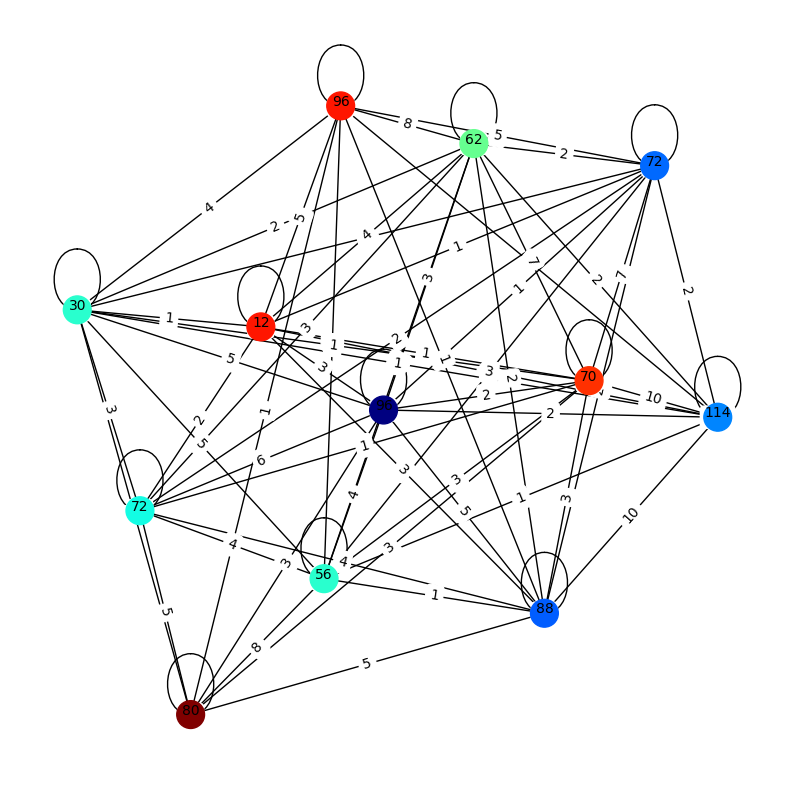

Drawing Communities...


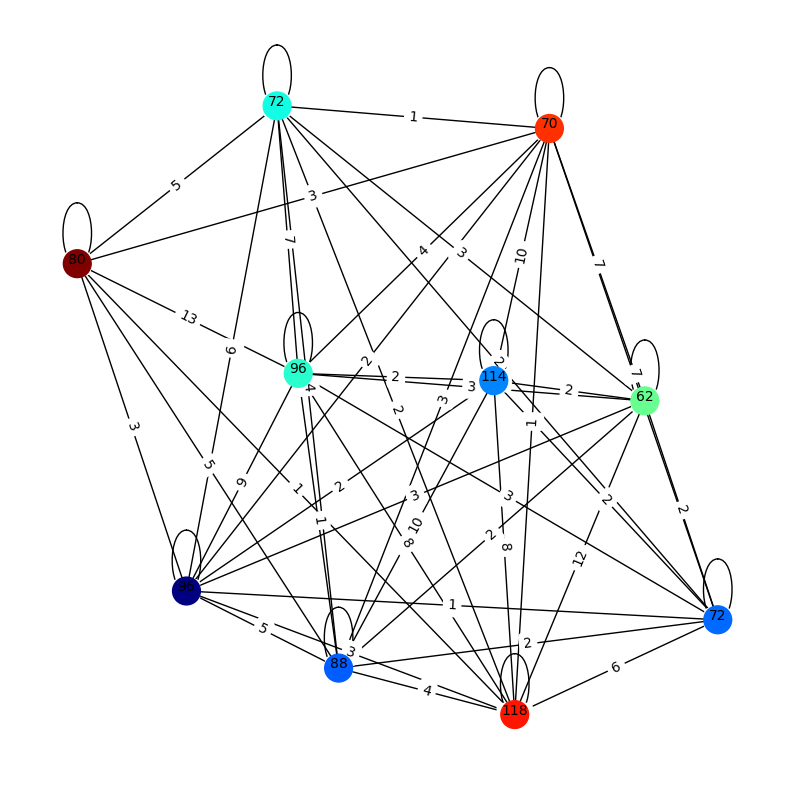

$$$$$$$$$$$$$$$$$starting pass number:  3 $$$$$$$$$$$$
#################Start First Phase############
	Iteration 1
		Node: 50 Community: 50
			delta_Q with node 33 is 0.14265679180560398
			delta_Q with node 32 is 0.13414890531150786
			delta_Q with node 11 is 0.14603386655099276
			delta_Q with node 108 is 0.15644451777554827
			delta_Q with node 50 is 0.1566068515497553
			delta_Q with node 36 is 0.13072925121550738
			delta_Q with node 97 is 0.1379916917042119
			delta_Q with node 94 is 0.14215116201709027
			delta_Q with node 57 is 0.14285106009276977
			delta_Q with node 47 is 0.14821073585101485
				Node: 50 Gain: 0.1566068515497553 No change in community
		Node: 33 Community: 33
			delta_Q with node 50 is 0.10350507891816516
			delta_Q with node 32 is 0.10471326799177154
			delta_Q with node 11 is 0.10230753468221167
			delta_Q with node 36 is 0.10135748292168859
			delta_Q with node 97 is 0.10620487586788693
			delta_Q with node 94 is 0.11493497334798773
			delta_Q with node 57

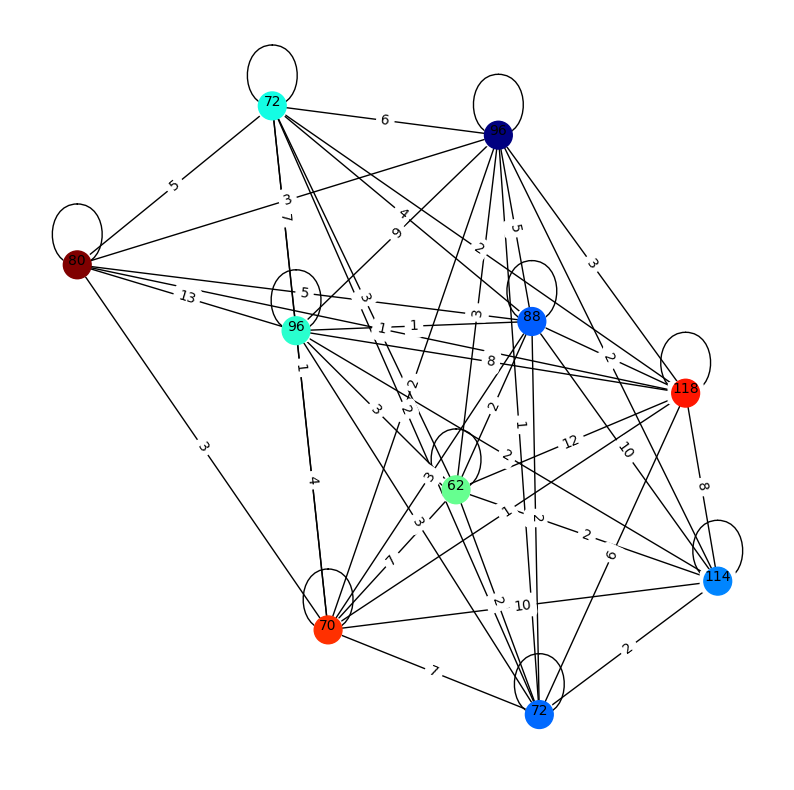

Drawing Communities...


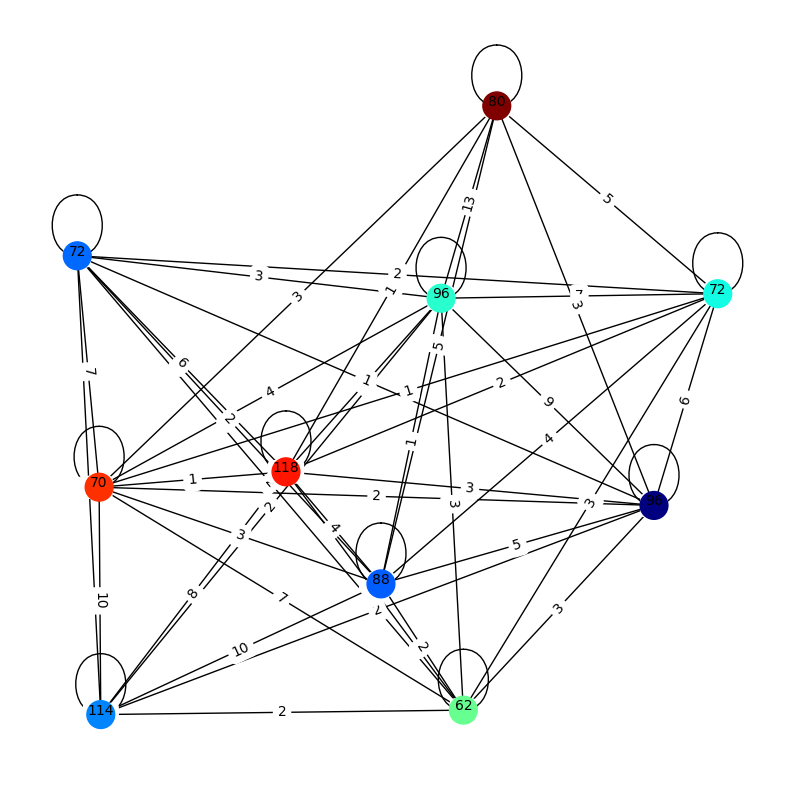

$$$$$$$$$$$$$$$$$starting pass number:  4 $$$$$$$$$$$$
#################Start First Phase############
	Iteration 1
		Node: 50 Community: 50
			delta_Q with node 33 is 0.14265679180560398
			delta_Q with node 32 is 0.13414890531150786
			delta_Q with node 11 is 0.14603386655099276
			delta_Q with node 108 is 0.15644451777554827
			delta_Q with node 36 is 0.13072925121550738
			delta_Q with node 97 is 0.1379916917042119
			delta_Q with node 94 is 0.14215116201709027
			delta_Q with node 57 is 0.14285106009276977
			delta_Q with node 47 is 0.14821073585101485
			delta_Q with node 50 is 0.1566068515497553
				Node: 50 Gain: 0.1566068515497553 No change in community
		Node: 33 Community: 33
			delta_Q with node 50 is 0.10350507891816516
			delta_Q with node 32 is 0.10471326799177154
			delta_Q with node 11 is 0.10230753468221167
			delta_Q with node 36 is 0.10135748292168859
			delta_Q with node 97 is 0.10620487586788693
			delta_Q with node 94 is 0.11493497334798773
			delta_Q with node 57

,time,modularity
0,0.149433,0.255169
1,0.010982,0.596413
2,0.001633,0.604570


In [8]:
path = '../DataSets/reels/karate/karate.gml'
graphs = get_graphs()

graph = graphs[1]
syn_graph = load_synth_graph(f'../DataSets/synthétiques/net2/')
louvain = Louvain()

start = time.time()
partition, history = louvain.getBestPartition(graph, verbose=True, plot=True)
end = time.time()


print(f"Total time taken: {end - start}")

p = defaultdict(list)
for k, v in partition.items():
    p[v].append(k)
pprint.pprint(p)

performance = pd.DataFrame({'time': [his[0] for his in history], 'modularity': [his[1] for his in history]})
performance